# Difference Equation tester
Input your numerator and denominator coefficients for a discrete transfer function and a sample period $T_s$. The cells below compare the performance of your difference equation to the step response of a discrete system created from your coefficients. If your difference equation is correct, the results will agree with the step response. 

This will hopefully help you do some error checking before implementing your difference equation HIL.

In [ ]:
import numpy as np # numerical arrays
import matplotlib.pyplot as plt # plotting
%config InlineBackend.figure_format='retina' # high-res plots
import control.matlab as ctm # matlab layer for control systems library

In [ ]:
# Function
def dot(a, b): # dot product of two lists
    out = 0 
    for idx in range(len(a)): 
        out += a[idx] * b[idx]
    return out 


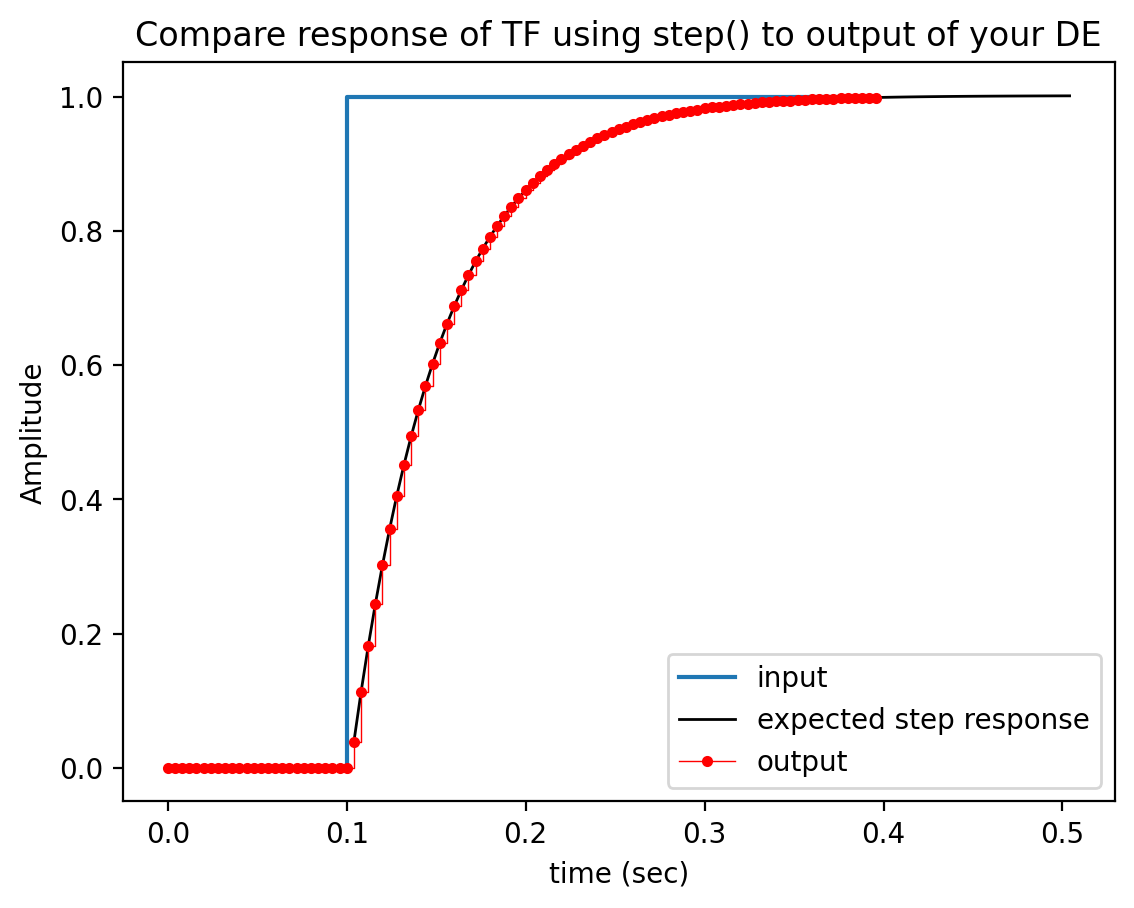

In [2]:


# num and den from the lab4 DE example slide:
num = [0.0385, 0.0385]
den = [1, -0.9231]

m = len(num)
n = len(den)

Ts = 0.004      # sample period.
Tend = 0.4      # end time
Tstep = 0.1     # time of the unit input step

#define the step input 'x' and time vectors
t = np.arange(0, Tend, Ts)
x = np.ones_like(t)
x[0:int(Tstep/Ts)] = 0

# define the running DE output signal history with the same length as it has on the pyboard
output = [0]*(n-1)
y = np.zeros_like(t)  # an array to save the output data

# formulate transfer function and get step response
test_tf = ctm.tf(num, den, Ts)
ystep, t_stepresp = ctm.step(test_tf, T=Tend)
t_stepresp += Tstep+Ts  # time shift the step response for the plot

for i in range(max(n,m)+1,len(t)):
    # get the short-term history of the input signal, in the same way as the pyboard lab4 code would have it (newest to oldest)
    input = x[i-m:i][::-1]  # the "[::-1]" is one of Python's highly intuitive ways of reversing this list

    # code your difference equation here:
    new = 0
    
    # save the short-term history of the DE output in the same way as done on the pyboard lab4 code
    output = [new] + output[:-1] 


    # explicitly coded example 1st order filter from the lab4 slides
    # if i > 1:
    #     new = (1.0/a0) * (b0*x[i] + b1*x[i-1] - a1*y[i-1] )
    # else:
    #     new = 0

    # save the DE output into the array (full history), for later plotting
    y[i] = new


plt.figure()
plt.title("Compare response of TF using step() to output of your DE")
plt.step(t, x, label='input', where='post')
# plt.step(t_stepresp, ystep, '.-', color='black', label='expected step response', markersize=5, linewidth=1, where='post')
plt.plot(t_stepresp, ystep, '.-', color='black', label='expected step response', markersize=0, linewidth=1)
plt.step(t, y, '.-', color='red', label='output',  where='post', markersize=6, linewidth=0.5)
plt.legend()
plt.xlabel('time (sec)')
plt.ylabel('Amplitude')
plt.show()
